### Student Grades Prediction

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
for col in df.columns:
    print(df[col].value_counts())

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Here we got the object datatype in our features so we need to deal with this datatype and convert this in to int/float datatype

In [5]:
for i in df.columns:
    print(df[i].unique())

['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087' 'CS-97088' 'CS-97089' 'CS-97

In [6]:
print("The number of rows and columns in the dataset:",df.shape)

The number of rows and columns in the dataset: (571, 43)


In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
#checking for null values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [9]:
df.isnull().sum().sum() #tota numbers of nulls present in dataset

425

### Filling null values

In [10]:
#replace null values with unknown values
df.fillna('unknown',inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
#dropping unwanted column
df.drop('Seat No.',axis=1,inplace=True)

In [13]:
### Plotting Countplot for visualization

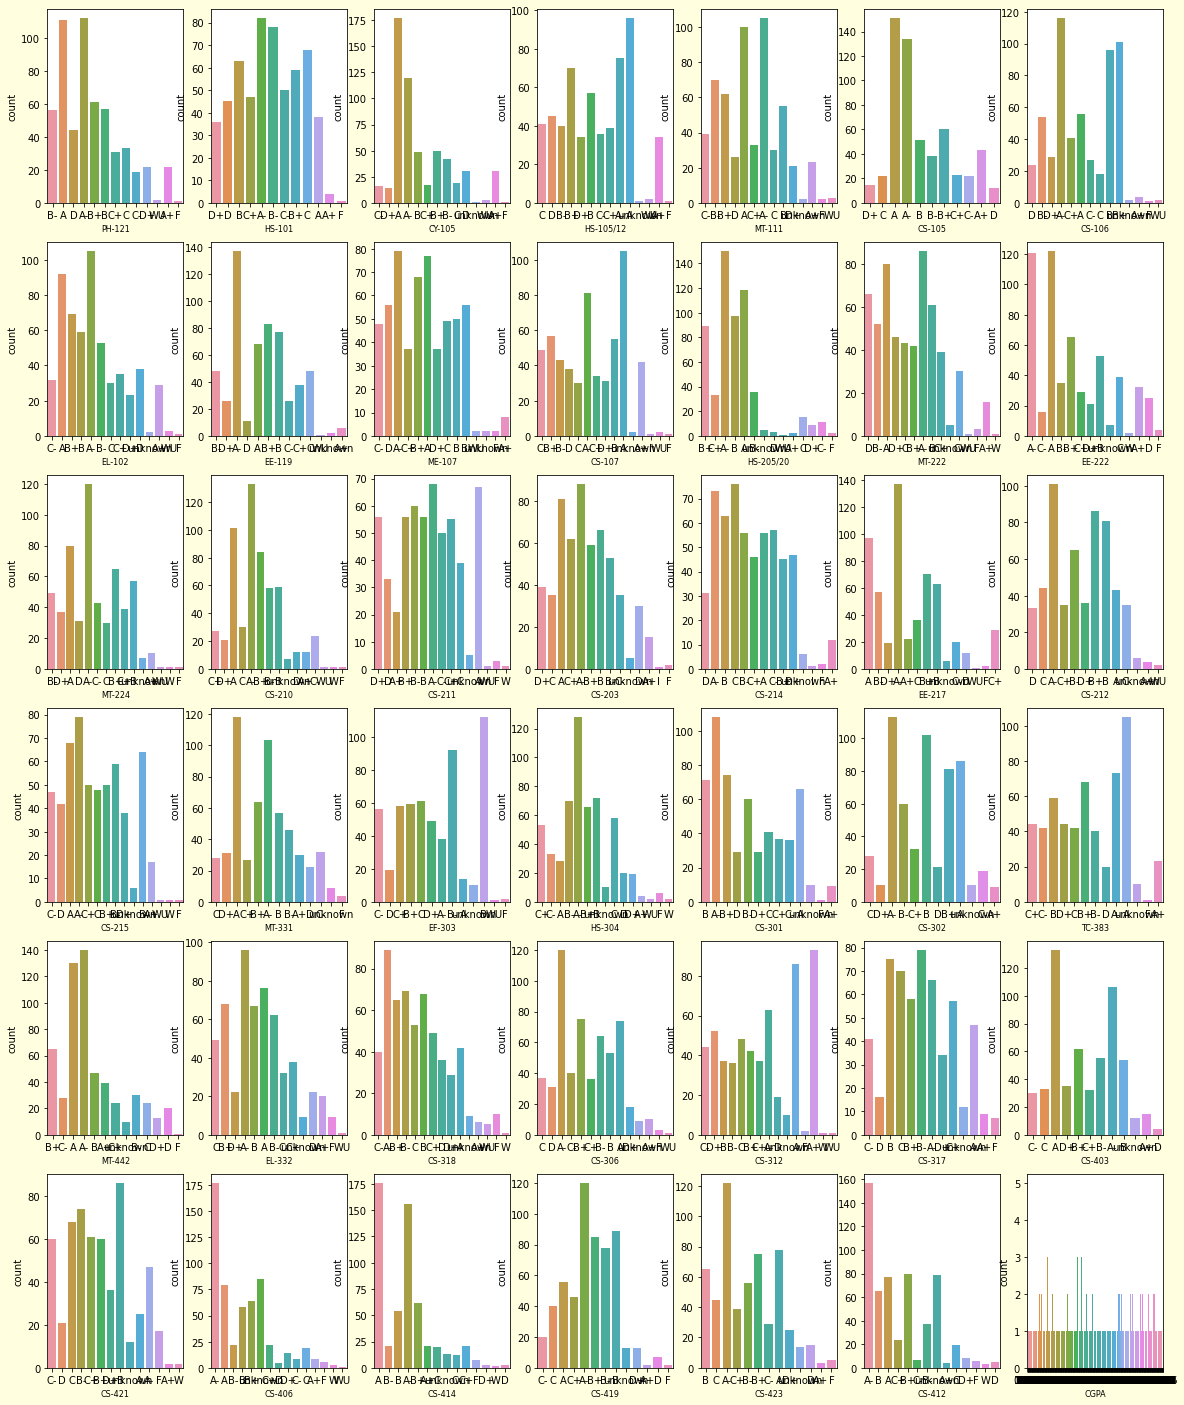

In [14]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnumber=1
for column in df:
    if plotnumber<=42:
        ax=plt.subplot(6,7,plotnumber)
        sns.countplot(x=df[column],data=df)
        plt.xlabel(column,fontsize=8)
    plotnumber +=1
    
plt.show()    

### Converting categorial into int

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lab_enc=LabelEncoder()

In [18]:
#applying label encoding to all columns
for col in df.columns:
    df[col]=lab_enc.fit_transform(df[col])

In [19]:
print(df)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         5       8  ...       8   

In [20]:
df.shape

(571, 42)

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PH-121,571.0,3.781086,3.046895,0.0,2.0,3.0,6.0,12.0
HS-101,571.0,5.071804,2.785317,0.0,3.0,5.0,7.0,11.0
CY-105,571.0,2.921191,2.992228,0.0,0.0,2.0,5.0,13.0
HS-105/12,571.0,4.264448,3.216478,0.0,2.0,4.0,7.0,13.0
MT-111,571.0,3.935201,3.034481,0.0,2.0,4.0,6.0,13.0
CS-105,571.0,2.838879,2.696709,0.0,0.0,2.0,4.0,10.0
CS-106,571.0,4.161121,2.774311,0.0,2.0,4.0,6.0,13.0
EL-102,571.0,3.998249,3.075939,0.0,2.0,4.0,6.0,13.0
EE-119,571.0,3.921191,2.698100,0.0,2.0,3.0,6.0,12.0
ME-107,571.0,4.817863,3.179170,0.0,2.0,5.0,8.0,13.0


In [22]:
### Plottig heatmap

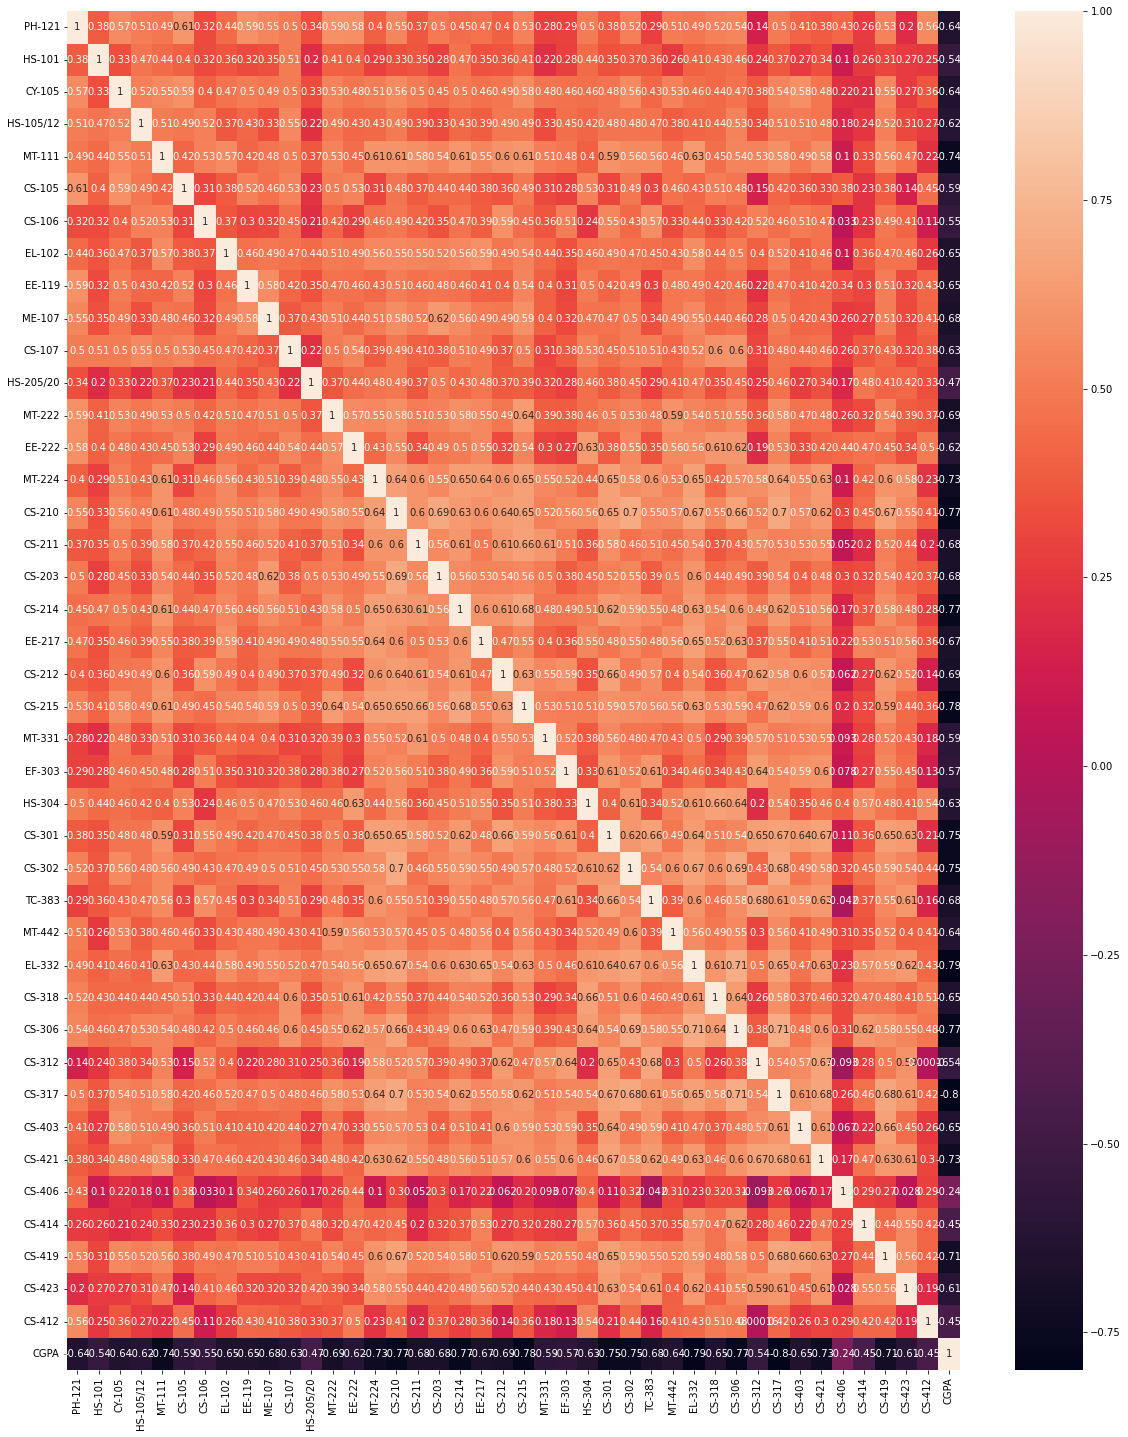

In [23]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

since features are alot in numbers then we can use the PCA technique for feature selection

In [24]:
from sklearn.preprocessing import StandardScaler

### Splitting Dataset into X and Y

In [25]:
df_features=df.drop('CGPA',axis=1)

In [26]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df_features)
x_scaled

array([[ 0.40040198,  1.77089951,  1.69882193, ...,  1.47511762,
        -0.39894144, -0.62983853],
       [-1.24205154,  1.4115592 ,  2.36780629, ...,  0.7217257 ,
         0.58861157, -0.38485365],
       [-1.24205154, -0.74448263, -0.97711551, ..., -1.53845004,
        -0.72812577, -1.11980829],
       ...,
       [-0.25657943, -1.82250355, -0.30813115, ..., -0.03166621,
        -0.72812577, -0.62983853],
       [-1.24205154, -0.38514232,  2.03331411, ..., -0.40836217,
         0.25942723,  0.35010098],
       [ 0.72889268,  1.4115592 ,  2.03331411, ..., -0.03166621,
         1.57616457,  0.84007074]])

In [27]:
from sklearn.decomposition import PCA


### Using PCA for feature selection

In [28]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 5.01859942, -0.99760015, -3.26809521, ...,  0.21821638,
         0.1831919 , -0.05455257],
       [ 5.94386   , -1.16089338, -0.41516386, ...,  0.65666425,
         0.21115628, -0.0342043 ],
       [-4.88160434, -1.59870818, -0.13280306, ...,  0.51403636,
         0.15888253, -0.15677399],
       ...,
       [-3.47325854,  0.98005032,  1.97123846, ..., -0.41236761,
         0.01138279,  0.65682709],
       [ 3.95670898,  0.11676517,  0.39146301, ...,  0.63683576,
        -0.47377292, -0.6511449 ],
       [ 6.52261446,  1.251297  ,  1.01546664, ..., -0.11764641,
        -0.76174181, -0.33411503]])

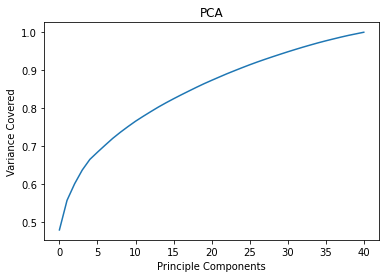

In [29]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principle Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

The first 35 components account for about 95% of the total explained variance. We can run the analysis again only with these 35 components.


In [30]:
pca_red = PCA(n_components=35)
new_X = pca_red.fit_transform(x_scaled)
X=pd.DataFrame(new_X,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11',
                             'pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20',
                             'pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28','pc29',
                             'pc30','pc31','pc32','pc33','pc34','pc35'])
X

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35
0,5.018599,-0.997600,-3.268095,-0.072099,-0.873914,-0.193339,-0.902911,0.675686,0.024882,1.241558,...,0.801999,0.079395,0.456549,0.497911,1.411946,-0.948754,0.410823,0.304556,-0.322741,0.392156
1,5.943860,-1.160893,-0.415164,0.412467,0.785069,-0.204107,-0.883961,-0.187686,1.784125,1.353525,...,0.625869,0.538835,0.835488,0.140570,-0.556726,-0.556631,0.621519,0.304059,-0.114576,0.112617
2,-4.881604,-1.598708,-0.132803,-1.543145,-0.333567,0.297150,0.285492,0.312776,0.416936,-0.087334,...,0.014090,-0.436086,-0.089161,-0.354715,0.030900,0.549037,-0.360862,-0.280869,-0.054738,-0.748560
3,7.136420,-1.593956,-1.439535,-0.191501,0.022249,0.079724,1.463455,-0.594116,0.761794,-1.541741,...,-0.240339,-0.280432,-0.893472,-0.642259,-0.121143,-0.618833,-0.207738,-0.408008,-0.816607,-0.775604
4,-3.351427,-2.005474,-0.479116,-1.099988,1.016562,-0.240140,-1.105281,-1.528846,0.186428,0.185711,...,-0.467064,0.115097,0.132813,0.202934,-0.995357,-0.007391,-0.050265,0.322252,0.040729,0.197920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-6.142020,-0.257109,0.545776,0.022611,0.483656,-0.124167,1.151045,0.399969,0.204864,-0.750291,...,0.849538,0.165597,0.159253,-0.135080,-0.962950,-0.175802,0.367541,0.384773,0.448204,0.071571
567,-6.230806,0.104108,1.715951,0.608521,-0.004826,0.115857,1.632944,-1.017629,0.195939,-0.022223,...,0.711936,0.445627,-0.218774,-0.150358,-0.128030,-0.147863,-0.335402,0.146800,0.775883,-0.002468
568,-3.473259,0.980050,1.971238,0.186899,0.886915,-0.205148,0.950559,-0.303968,-0.091804,1.464674,...,1.349920,-0.243050,-0.697519,-0.382405,-0.869527,-0.361991,0.660076,0.449491,-0.449210,0.129355
569,3.956709,0.116765,0.391463,1.485645,-0.011135,1.031579,-0.791274,-1.438813,1.001431,1.223387,...,0.737591,-0.232765,-0.330569,0.167388,0.067913,1.334836,-0.644245,-0.941059,-0.728191,-0.525433


In [31]:
#label
Y=df.CGPA

### Now that we have our features and target labels, let us proceed to model development.

##### For Best Random State

In [33]:
lr=LinearRegression()

In [34]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if(round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1)):
        print("At random_state",i,"the model performed very well")
        print("At random_state",i)
        print("Trainning Score",r2_score(y_train,pred_train)*100)
        print("Testing Score",r2_score(y_test,pred_test)*100,'\n\n')

At random_state 46 the model performed very well
At random_state 46
Trainning Score 93.06191132707045
Testing Score 93.10385400814508 




In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=46)

In [36]:
print("Shape of x_train",x_train.shape)    
print("Shape of x_test",x_test.shape)    
print("Shape of y_train",y_train.shape)    
print("Shape of y_test",y_test.shape)    

Shape of x_train (456, 35)
Shape of x_test (115, 35)
Shape of y_train (456,)
Shape of y_test (115,)


### Writing one function for different models accuracy


In [37]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train,y_train)
    if train==True:
        y_pred=clf.predict(x_train)
        print('=================Train Result================')
        print(f"Accracy Score:{r2_score(y_train,y_pred)*100:.2f}%")
        
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print('=================Test Result================')
        print(f"Accracy Score:{r2_score(y_test,pred)*100:.2f}%")
        
        print('\nMean absolute Error: ',mean_absolute_error(y_test,pred))
        print('Mean Squared Error: ',mean_squared_error(y_test,pred))
        print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))


### Linear Regression

In [38]:
lr=LinearRegression()
#lr.fit(x_train,y_train)

In [39]:
print("Accuracy Score for Linear Regression Model:\n")
metric_score(lr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(lr,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for Linear Regression Model:

=================Train Result================
Accracy Score:93.06%
=================Test Result================
Accracy Score:93.10%

Mean absolute Error:  25.787493931629022
Mean Squared Error:  1347.6234390852337
Root Mean Squared Error:  36.70999099816334


### Plotting curve for visualization 

In [40]:
lr.fit(x_train,y_train)
lr_train=lr.predict(x_train)
lr_test=lr.predict(x_test)
print("value of intercept :",lr.intercept_)
print("Coefficients of the columns\n",lr.coef_)

value of intercept : 248.15543862412432
Coefficients of the columns
 [-29.51673435  -0.68421898   7.4998519   -0.9057997    8.53010529
   6.90541311   2.67057817  -5.50111731  13.6106063    9.31563597
  -4.6372578   13.37466705   2.6491691  -12.17795565   7.89385383
  -5.03316888  -7.55015774   6.00954283   7.76626776   5.19793742
  -5.90547144  -8.50271901   0.19123258   0.18561843   4.13491437
   8.13305015   4.45615373   0.11248774   5.06901688  -3.94492577
  -3.18426851   6.65343485   9.06471699  -1.59434875   3.88016563]


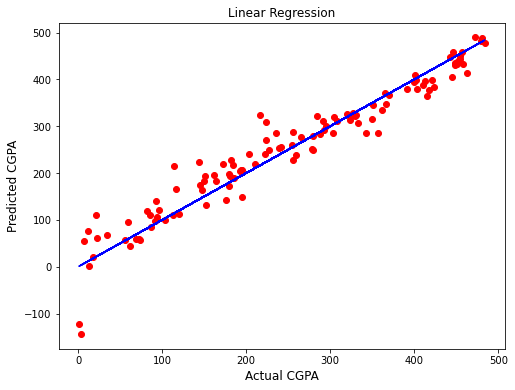

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=lr_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual CGPA",fontsize=12)
plt.ylabel("Predicted CGPA",fontsize=12)
plt.title("Linear Regression")
plt.show()

### Checking accuracy with other models as well.


### DecisionTree

In [42]:
dt=DecisionTreeRegressor()

In [43]:
print("Accuracy Score for Decision Tree Model:\n")
metric_score(dt,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(dt,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for Decision Tree Model:

=================Train Result================
Accracy Score:100.00%
=================Test Result================
Accracy Score:98.41%

Mean absolute Error:  13.504347826086956
Mean Squared Error:  310.6521739130435
Root Mean Squared Error:  17.625327625693757


In [44]:
dt.fit(x_train,y_train)
dt_train=dt.predict(x_train)
dt_test=dt.predict(x_test)

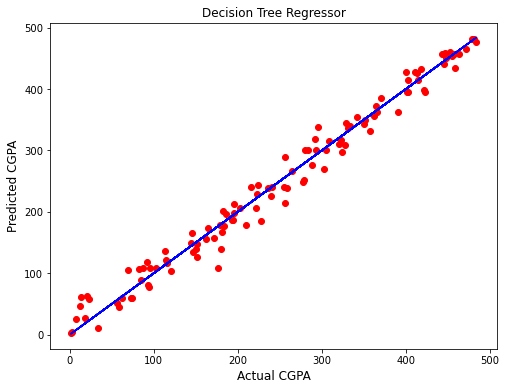

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=dt_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual CGPA",fontsize=12)
plt.ylabel("Predicted CGPA",fontsize=12)
plt.title("Decision Tree Regressor")
plt.show()

### Random Forest

In [46]:
rf=RandomForestRegressor()

In [47]:
print("Accuracy Score for Random Forest Model:\n")
metric_score(rf,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(rf,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for Random Forest Model:

=================Train Result================
Accracy Score:99.71%
=================Test Result================
Accracy Score:99.22%

Mean absolute Error:  8.990782608695653
Mean Squared Error:  152.92019826086954
Root Mean Squared Error:  12.366090662002666


In [48]:
rf.fit(x_train,y_train)
rf_train=rf.predict(x_train)
rf_test=rf.predict(x_test)

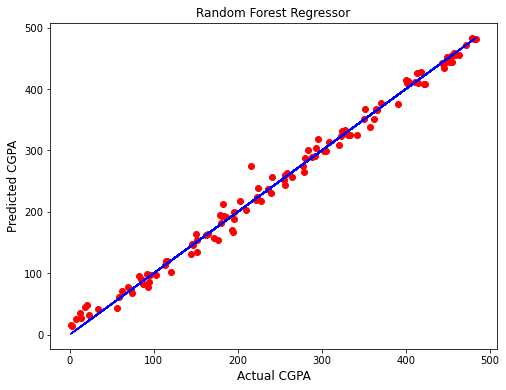

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=rf_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual CGPA",fontsize=12)
plt.ylabel("Predicted CGPA",fontsize=12)
plt.title("Random Forest Regressor")
plt.show()

### Support Vector Regressor

In [50]:
svr=SVR()

In [51]:
print("Accuracy Score for Support Vector Model:\n")
metric_score(svr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(svr,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for Support Vector Model:

=================Train Result================
Accracy Score:50.85%
=================Test Result================
Accracy Score:50.11%

Mean absolute Error:  82.00003552360987
Mean Squared Error:  9749.629447528698
Root Mean Squared Error:  98.74021190745287


In [52]:
svr.fit(x_train,y_train)
svr_train=svr.predict(x_train)
svr_test=svr.predict(x_test)

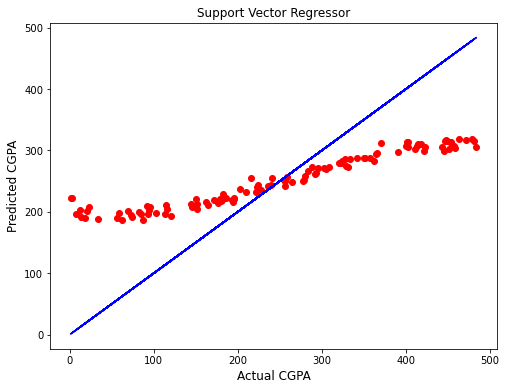

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=svr_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual CGPA",fontsize=12)
plt.ylabel("Predicted CGPA",fontsize=12)
plt.title("Support Vector Regressor")
plt.show()

### AdaBoostRegressor

In [54]:
ada=AdaBoostRegressor()

In [55]:
print("Accuracy Score for AdaBoost Model:\n")
metric_score(ada,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(ada,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for AdaBoost Model:

=================Train Result================
Accracy Score:98.60%
=================Test Result================
Accracy Score:98.50%

Mean absolute Error:  12.654456109204233
Mean Squared Error:  292.55610320446243
Root Mean Squared Error:  17.104271490024427


In [56]:
ada.fit(x_train,y_train)
ada_train=ada.predict(x_train)
ada_test=ada.predict(x_test)

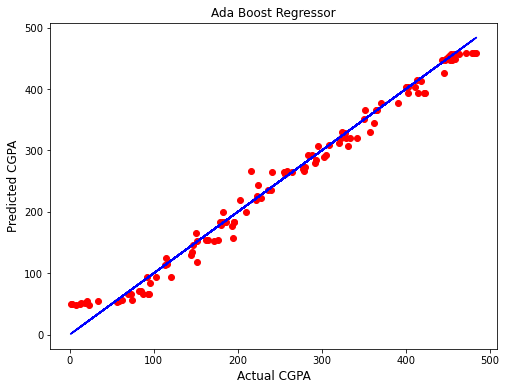

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ada_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual CGPA",fontsize=12)
plt.ylabel("Predicted CGPA",fontsize=12)
plt.title("Ada Boost Regressor")
plt.show()

 #### Choosing the best Model (Random Forest Regressor) Model as its Giving the best Accuracy Score for both train and test data , also no need to tune the parameters as we are getting good accuracy
 
#### Saving the model in Random Forest

In [58]:
import pickle

In [59]:
filename='Student Grades Predcitions.pkl'

In [60]:
pickle.dump(rf,open(filename,'wb'))

In [61]:
#conclusion
loaded_model=pickle.load(open('Student Grades Predcitions.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.21697801956581


our final model is giving me 96% approx accuracy

In [62]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],rf_test[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
Predcited,101.57,211.96,167.92,324.92,162.58,231.08,298.78,366.88,70.64,163.77,...,427.93,41.38,323.01,410.12,275.34,219.96,443.68,412.48,375.07,90.17
Orignal,101.57,211.96,167.92,324.92,162.58,231.08,298.78,366.88,70.64,163.77,...,427.93,41.38,323.01,410.12,275.34,219.96,443.68,412.48,375.07,90.17
